In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
data=pd.read_csv('C:/Users/USER/Desktop/DS/black-friday/train.csv')

In [44]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [45]:
percent=data.isnull().sum()*100/len(data) # Perecntage of data missing
percent

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

# Inference- Majority of category 3 data is missing around 70% approx

In [46]:
data.shape

(550068, 12)

In [47]:
data.describe(include='object')

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [48]:
data.Product_Category_1.sum()
data.Product_Category_2.sum()
data.Product_Category_3.sum()

2113329.0

In [49]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [50]:
#data['Product_Category_3']=data['Product_Category_3'].fillna(data['Product_Category_3'].mean(),axis=0)
data.fillna(0,inplace=True)

In [51]:
#data['Product_Category_3']

In [52]:
#data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].mean(),axis=0)


In [53]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [54]:
data.Gender=data.Gender.map({'F':1,'M':0})

In [55]:
data.Gender

0         1
1         1
2         1
3         1
4         0
         ..
550063    0
550064    1
550065    1
550066    1
550067    1
Name: Gender, Length: 550068, dtype: int64

In [56]:
data.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200


In [57]:
#data.Stay_In_Current_City_Years.unique()
data.Age.unique()
#data.Occupation.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [58]:
age_dummies=pd.get_dummies(data.Age,drop_first=True) #when no ranking to give use dummies

In [59]:
age_dummies

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
550063,0,0,0,0,1,0
550064,0,1,0,0,0,0
550065,0,1,0,0,0,0
550066,0,0,0,0,0,1


In [60]:
data=pd.concat([data,age_dummies],axis=1)

In [61]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,26-35,36-45,46-50,51-55,55+
0,1000001,P00069042,1,0-17,10,A,2,0,3,0.0,0.0,8370,0,0,0,0,0,0
1,1000001,P00248942,1,0-17,10,A,2,0,1,6.0,14.0,15200,0,0,0,0,0,0
2,1000001,P00087842,1,0-17,10,A,2,0,12,0.0,0.0,1422,0,0,0,0,0,0
3,1000001,P00085442,1,0-17,10,A,2,0,12,14.0,0.0,1057,0,0,0,0,0,0
4,1000002,P00285442,0,55+,16,C,4+,0,8,0.0,0.0,7969,0,0,0,0,0,1


In [62]:
data.drop('Age',axis=1,inplace=True)

In [63]:
data.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,26-35,36-45,46-50,51-55,55+
0,1000001,P00069042,1,10,A,2,0,3,0.0,0.0,8370,0,0,0,0,0,0
1,1000001,P00248942,1,10,A,2,0,1,6.0,14.0,15200,0,0,0,0,0,0
2,1000001,P00087842,1,10,A,2,0,12,0.0,0.0,1422,0,0,0,0,0,0
3,1000001,P00085442,1,10,A,2,0,12,14.0,0.0,1057,0,0,0,0,0,0
4,1000002,P00285442,0,16,C,4+,0,8,0.0,0.0,7969,0,0,0,0,0,1


In [64]:
stay_dummies=pd.get_dummies(data.Stay_In_Current_City_Years,drop_first=True)

In [65]:
data=pd.concat([data,stay_dummies],axis=1)
data=data.drop(['Stay_In_Current_City_Years'],axis=1)

In [66]:
data.head()

,User_ID,Product_ID,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,26-35,36-45,46-50,51-55,55+,1,2,3,4+
0,1000001,P00069042,1,10,A,0,3,0.0,0.0,8370,0,0,0,0,0,0,0,1,0,0
1,1000001,P00248942,1,10,A,0,1,6.0,14.0,15200,0,0,0,0,0,0,0,1,0,0
2,1000001,P00087842,1,10,A,0,12,0.0,0.0,1422,0,0,0,0,0,0,0,1,0,0
3,1000001,P00085442,1,10,A,0,12,14.0,0.0,1057,0,0,0,0,0,0,0,1,0,0
4,1000002,P00285442,0,16,C,0,8,0.0,0.0,7969,0,0,0,0,0,1,0,0,0,1


In [67]:
data.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

In [68]:
c_dummies=pd.get_dummies(data.City_Category,drop_first=True)
c_dummies

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
550063,1,0
550064,0,1
550065,1,0
550066,0,1


In [69]:
data=pd.concat([data,c_dummies],axis=1)
data
data.drop(['City_Category'],axis=1,inplace=True)

In [70]:
data.Product_ID.value_counts()

P00265242    1880
P00025442    1615
P00110742    1612
P00112142    1562
P00057642    1470
             ... 
P00038642       1
P00231642       1
P00167342       1
P00012942       1
P00308042       1
Name: Product_ID, Length: 3631, dtype: int64

In [71]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data.Product_ID=lb.fit_transform(data.Product_ID)

In [72]:
correlation=data.corr()
correlation=np.abs(correlation)

In [73]:
correlation


,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,...,36-45,46-50,51-55,55+,1,2,3,4+,B,C
User_ID,1.000000,0.017851,0.033474,0.023971,0.020443,0.003825,0.003896,0.003605,0.004716,0.061903,...,0.010785,0.028149,0.006963,0.004961,0.019574,0.018551,0.030953,0.019567,0.019688,0.008272
Product_ID,0.017851,1.000000,0.015916,0.007424,0.011621,0.074717,0.090586,0.138323,0.109345,0.015244,...,0.012421,0.009871,0.010426,0.011689,0.000541,0.003240,0.000524,0.004118,0.005545,0.008729
Gender,0.033474,0.015916,1.000000,0.117291,0.011603,0.045594,0.000954,0.036146,0.060346,0.000246,...,0.000088,0.029262,0.006416,0.004921,0.030400,0.008806,0.011080,0.027125,0.006155,0.000426
Occupation,0.023971,0.007424,0.117291,1.000000,0.024280,0.007618,0.006712,0.012269,0.020833,0.096659,...,0.058309,0.020323,0.030846,0.044096,0.002092,0.012716,0.025974,0.013905,0.011673,0.034529
Marital_Status,0.020443,0.011621,0.011603,0.024280,1.000000,0.019888,0.001099,0.004629,0.000463,0.189174,...,0.013227,0.191389,0.172278,0.091778,0.028831,0.006474,0.013635,0.006782,0.001863,0.033661
Product_Category_1,0.003825,0.074717,0.045594,0.007618,0.019888,1.000000,0.067877,0.385534,0.343703,0.035036,...,0.011429,0.025842,0.025784,0.033925,0.006121,0.007000,0.010995,0.006624,0.006076,0.008554
Product_Category_2,0.003896,0.090586,0.000954,0.006712,0.001099,0.067877,1.000000,0.094750,0.052288,0.012391,...,0.006651,0.008219,0.009457,0.003799,0.001557,0.000494,0.000637,0.000846,0.004534,0.015555
Product_Category_3,0.003605,0.138323,0.036146,0.012269,0.004629,0.385534,0.094750,1.000000,0.288501,0.003891,...,0.001271,0.002657,0.001806,0.008228,0.003403,0.004742,0.003398,0.002331,0.006270,0.032508
Purchase,0.004716,0.109345,0.060346,0.020833,0.000463,0.343703,0.052288,0.288501,1.000000,0.008831,...,0.006707,0.003317,0.014792,0.002904,0.002030,0.005358,0.002090,0.000988,0.019098,0.061012
18-25,0.061903,0.015244,0.000246,0.096659,0.189174,0.035036,0.012391,0.003891,0.008831,1.000000,...,0.235194,0.141595,0.129045,0.094879,0.027666,0.009724,0.023329,0.010036,0.013039,0.021766


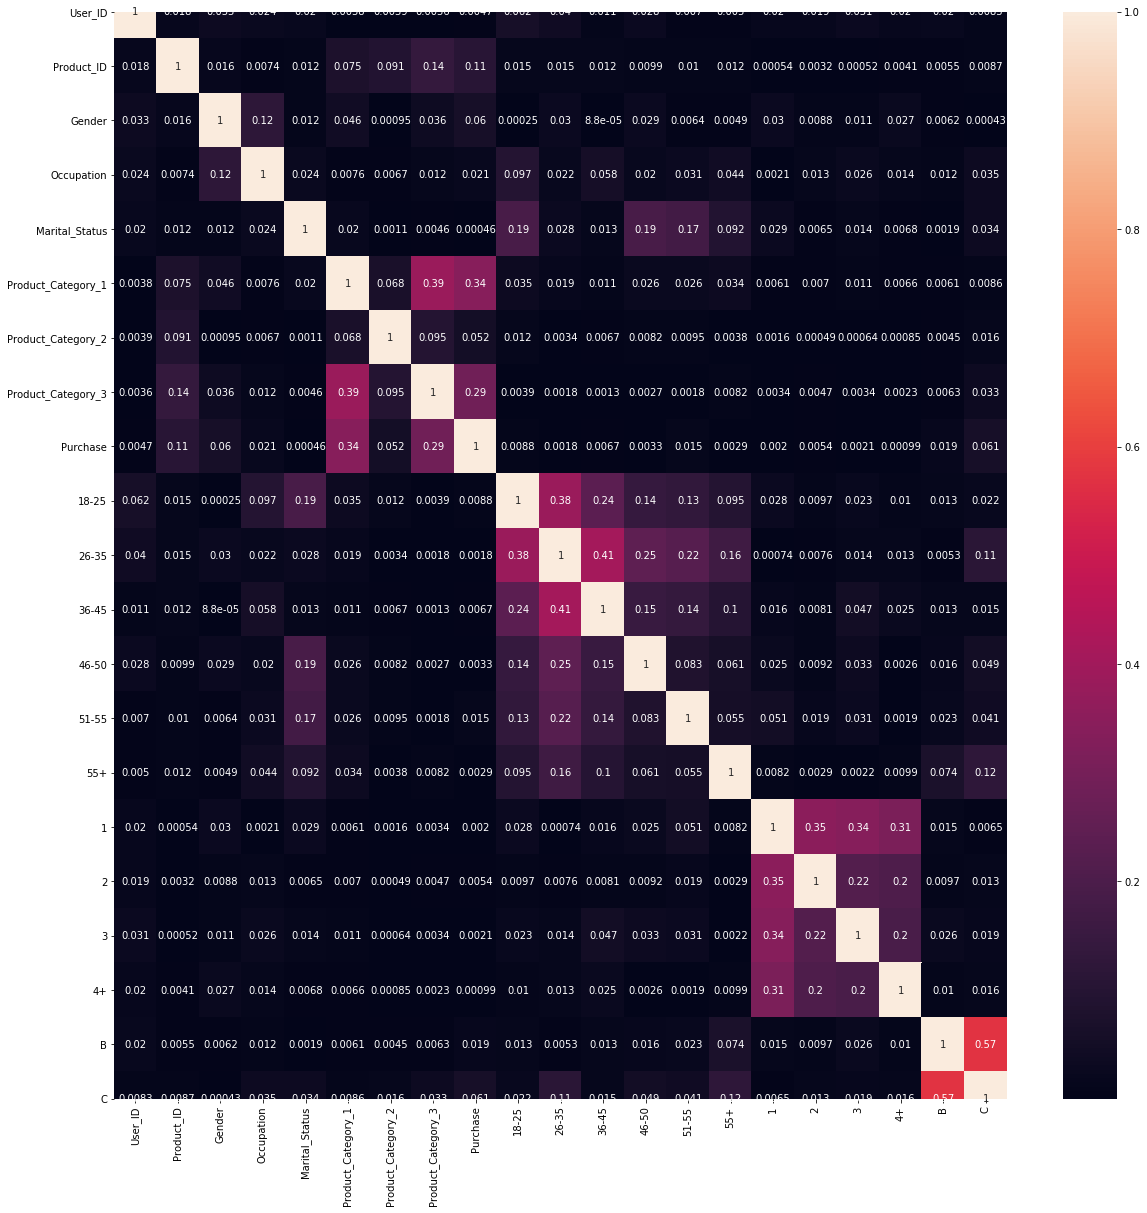

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(correlation,annot=True)

In [75]:
correlation['Purchase'].sort_values()

Marital_Status        0.000463
4+                    0.000988
26-35                 0.001830
1                     0.002030
3                     0.002090
55+                   0.002904
46-50                 0.003317
User_ID               0.004716
2                     0.005358
36-45                 0.006707
18-25                 0.008831
51-55                 0.014792
B                     0.019098
Occupation            0.020833
Product_Category_2    0.052288
Gender                0.060346
C                     0.061012
Product_ID            0.109345
Product_Category_3    0.288501
Product_Category_1    0.343703
Purchase              1.000000
Name: Purchase, dtype: float64

In [76]:
X=data.drop(['Purchase'],axis=1)
Y=data.Purchase

In [77]:
data.head()


,User_ID,Product_ID,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,18-25,...,36-45,46-50,51-55,55+,1,2,3,4+,B,C
0,1000001,672,1,10,0,3,0.0,0.0,8370,0,...,0,0,0,0,0,1,0,0,0,0
1,1000001,2376,1,10,0,1,6.0,14.0,15200,0,...,0,0,0,0,0,1,0,0,0,0
2,1000001,852,1,10,0,12,0.0,0.0,1422,0,...,0,0,0,0,0,1,0,0,0,0
3,1000001,828,1,10,0,12,14.0,0.0,1057,0,...,0,0,0,0,0,1,0,0,0,0
4,1000002,2734,0,16,0,8,0.0,0.0,7969,0,...,0,0,0,1,0,0,0,1,0,1


# Train, test ,split

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=100)

# Scaling -If feautues are in different range we need to scale them like all bw 0 or 1 /-1 or 1.

In [79]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale=sc.fit(X) # learns to fit into range
x_train=scale.transform(x_train)   # applies it
x_test=scale.transform(x_test)   # If you are working on separate test date which has different range then dont fir the model to test data , only tranform it, it has learned from training set or else output will not be good

In [80]:
#from sklearn.ensemble import RandomForestRegressor
#model=RandomForestRegressor()
#x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3)
#model.fit(x_train,y_train)
#model.score(x_test,y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3)
model.fit(x_train,y_train)
model.score(x_test,y_test)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
#from sklearn.linear_model import LinearRegression 
#model=LinearRegression()
#x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.3)
#model.fit(x_train,y_train)
#model.score(x_test,y_test)